In [ ]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as mplt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3) #Total no. of clusters
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

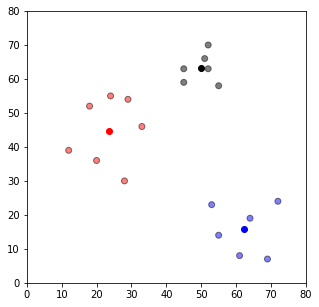

In [ ]:
fig = mplt.figure(figsize = (5,5))
colmap ={1: 'red', 2: 'black', 3: 'blue'}
colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
mplt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')

for idx, centroid in enumerate(centroids):
  mplt.scatter(*centroid, color=colmap[idx+1])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()

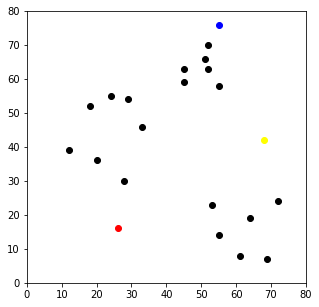

In [ ]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as mplt
%matplotlib inline

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

npy.random.seed(200)
k=3
#centroids[i] = [x, y]
centroids = {
    i+1: [npy.random.randint(0, 80), npy.random.randint(0,80)]
    for i in range(k)
}

fig = mplt.figure(figsize=(5, 5))
mplt.scatter(df['x'], df['y'], color='k')
colmap ={1: 'red', 2: 'yellow', 3: 'blue'}
for i in centroids.keys():
  mplt.scatter(*centroids[i], color=colmap[i])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1   red
1  20  36        20.880613        48.373546        53.150729        1   red
2  28  30        14.142136        41.761226        53.338541        1   red
3  18  52        36.878178        50.990195        44.102154        1   red
4  29  54        38.118237        40.804412        34.058773        3  blue


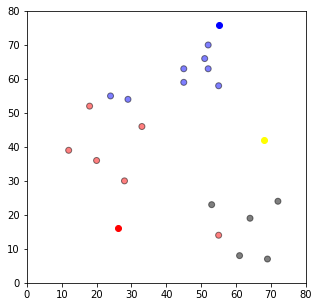

In [ ]:
def assignment(df, centroids):
  for i in centroids.keys():
    #sqrt((x1-x2)^2 - (y1-y2)^2)
    df['distance_from_{}'.format(i)] = (
        npy.sqrt(
            (df['x'] - centroids[i][0]) ** 2 +(df['y'] - centroids[i][1]) ** 2
        )
    )
  centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
  df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closest'].map(lambda x: colmap[x])
  return df
df = assignment(df, centroids)
print(df.head())

fig = mplt.figure(figsize = (5,5))
mplt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
colmap ={1: 'red', 2: 'yellow', 3: 'blue'}
for i in centroids.keys():
  mplt.scatter(*centroids[i], color=colmap[i])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()

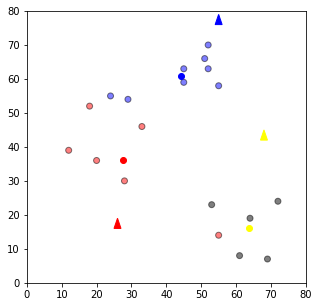

In [ ]:
import copy

centroids_prev = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = npy.mean(df[df['closest'] == i]['x'])
    centroids[i][1] = npy.mean(df[df['closest'] == i]['y'])
  return k

centroids = update(centroids)

fig = mplt.figure(figsize=(5, 5))
ax = mplt.axes()
mplt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  mplt.scatter(*centroids[i], color=colmap[i])
mplt.xlim(0,80)
mplt.ylim(0,80)
for i in centroids_prev.keys():
  x_prev = centroids_prev[i][0]
  y_prev = centroids_prev[i][1]
  dx = (centroids[i][0] - centroids[i][0]) * 0.75
  dy = (centroids[i][1] - centroids[i][1]) * 0.75
  ax.arrow(x_prev, y_prev, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
mplt.show()

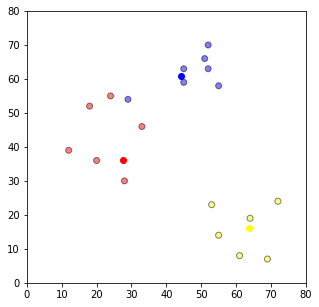

In [ ]:

df = assignment(df, centroids)

fig = mplt.figure(figsize = (5,5))
mplt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  mplt.scatter(*centroids[i], color=colmap[i])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()

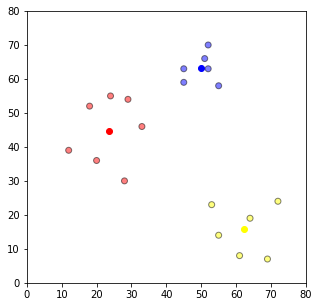

In [ ]:
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df, centroids)
  if closest_centroids.equals(df['closest']):
    break

fig = mplt.figure(figsize = (5,5))
mplt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
  mplt.scatter(*centroids[i], color=colmap[i])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()

In [ ]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3) #Total no. of clusters
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

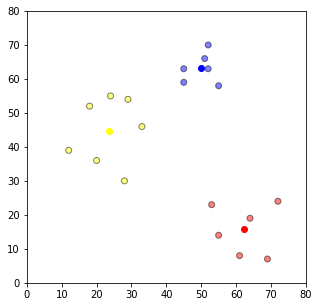

In [ ]:
fig = mplt.figure(figsize = (5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
mplt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
  mplt.scatter(*centroid, color=colmap[idx+1])
mplt.xlim(0,80)
mplt.ylim(0,80)
mplt.show()